# Analysis of the State of Air Quality in Dallas-Fort Worth-Arlington, Texas in the Past Decade (2011 to 2020).

Data for the air pollutants was downloaded from the United States Environment Protection Agency (https://www.epa.gov/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df_no2 = pd.read_csv(r'C:\Users\opio\Desktop\Data Science\python_projects\Dallas_air_quality\no2.csv')
df_co = pd.read_csv(r'C:\Users\opio\Desktop\Data Science\python_projects\Dallas_air_quality\co.csv')
df_o3 = pd.read_csv(r'C:\Users\opio\Desktop\Data Science\python_projects\Dallas_air_quality\ozone.csv')
df_pm25 = pd.read_csv(r'C:\Users\opio\Desktop\Data Science\python_projects\Dallas_air_quality\pm25.csv')
df_no2.head()

,Date,Source,Site ID,POC,Daily Max 1-hour NO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,08-03-20,AQS,481130069,4,8.3,ppb,8,Dallas Hinton,21,88,42602,Nitrogen dioxide (NO2),19100,"Dallas-Fort Worth-Arlington, TX",48,Texas,113,Dallas,32.820061,-96.860117
1,09-03-20,AQS,481130069,4,11.4,ppb,10,Dallas Hinton,24,100,42602,Nitrogen dioxide (NO2),19100,"Dallas-Fort Worth-Arlington, TX",48,Texas,113,Dallas,32.820061,-96.860117
2,10-03-20,AQS,481130069,4,15.3,ppb,14,Dallas Hinton,24,100,42602,Nitrogen dioxide (NO2),19100,"Dallas-Fort Worth-Arlington, TX",48,Texas,113,Dallas,32.820061,-96.860117
3,11-03-20,AQS,481130069,4,13.6,ppb,12,Dallas Hinton,24,100,42602,Nitrogen dioxide (NO2),19100,"Dallas-Fort Worth-Arlington, TX",48,Texas,113,Dallas,32.820061,-96.860117
4,12-03-20,AQS,481130069,4,18.2,ppb,17,Dallas Hinton,24,100,42602,Nitrogen dioxide (NO2),19100,"Dallas-Fort Worth-Arlington, TX",48,Texas,113,Dallas,32.820061,-96.860117


# Check Data Information

In [3]:
def information_func(df):
    print('DATA SHAPE')
    print(df.shape[0], 'rows and', df.shape[1], 'columns')
    print('---'*30)
    
    print('MISSIND DATA CHECK')
    print(df.isnull().sum())
    print('---'*30)
    
    print('TIME PERIOD COVERED')
    diff = pd.to_datetime(df['Date'].max()) - pd.to_datetime(df['Date'].min())
    print('NUmber of Days:', diff)
    print('--- END ---')

In [4]:
print('NO2')
information_func(df_no2)
print('=+='*30)

print('CO')
information_func(df_co)
print('=+='*30)

print('OZONE')
information_func(df_o3)
print('=+='*30)

print('PM2.5')
information_func(df_pm25)
print('=+='*30)

NO2
DATA SHAPE
3442 rows and 20 columns
------------------------------------------------------------------------------------------
MISSIND DATA CHECK
Date                                  0
Source                                0
Site ID                               0
POC                                   0
Daily Max 1-hour NO2 Concentration    0
UNITS                                 0
DAILY_AQI_VALUE                       0
Site Name                             0
DAILY_OBS_COUNT                       0
PERCENT_COMPLETE                      0
AQS_PARAMETER_CODE                    0
AQS_PARAMETER_DESC                    0
CBSA_CODE                             0
CBSA_NAME                             0
STATE_CODE                            0
STATE                                 0
COUNTY_CODE                           0
COUNTY                                0
SITE_LATITUDE                         0
SITE_LONGITUDE                        0
dtype: int64
-------------------------------------

# Data Cleaning

In [5]:
# Drop columns with redudant information which will not be useful in the analysis
def drop_columns(df):
    df = df.drop(['Source', 'Site ID', 'POC', 'UNITS', 'Site Name', 'CBSA_CODE', 'CBSA_NAME',
                    'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'STATE_CODE', 'STATE', 'COUNTY_CODE',
                      'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'], axis=1)

In [6]:
drop_columns(df_no2)
drop_columns(df_co)
drop_columns(df_o3)
drop_columns(df_pm25)

In [7]:
# Create new column with air quality index (AQI) categorization
def create_aqi_cat(df):
    df['AQI_cat'] = np.where(df['DAILY_AQI_VALUE'] <= 50, 'Good',
                            (np.where(df['DAILY_AQI_VALUE'] <=100, 'Moderate',
                                     np.where(df['DAILY_AQI_VALUE'] <= 150, 'Unhealthy for SH', 'Unhealthy'))))

# SH is an acronym for Sensitive Groups

In [8]:
create_aqi_cat(df_no2)
create_aqi_cat(df_co)
create_aqi_cat(df_o3)
create_aqi_cat(df_pm25)

# Analysis

Text(0.5, 1.0, 'Mean PM2.5 Concentration')

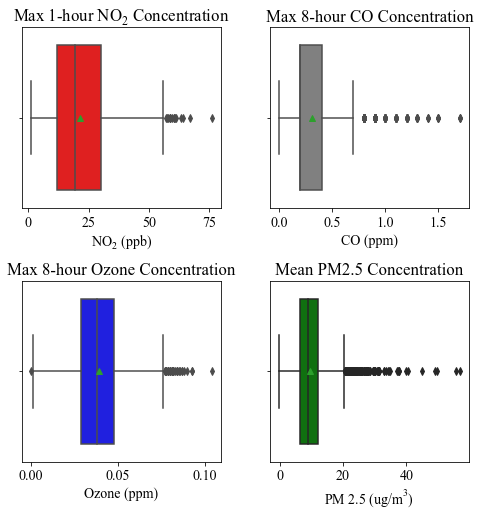

In [9]:
# Create Box Plots
fig, ax = plt.subplots(figsize=(8,8))
plt.gcf().subplots_adjust(hspace=0.4, wspace=0.25)

plt.subplot(2,2,1)
sns.boxplot(df_no2['Daily Max 1-hour NO2 Concentration'], orient='h', color='red', showmeans=True)
plt.xlabel('$\mathregular{NO_2}$ (ppb)')
plt.title('Max 1-hour $\mathregular{NO_2}$ Concentration')

plt.subplot(2,2,2)
sns.boxplot(df_co['Daily Max 8-hour CO Concentration'], orient='h', color='grey', showmeans=True)
plt.xlabel('CO (ppm)')
plt.title('Max 8-hour CO Concentration')

plt.subplot(2,2,3)
sns.boxplot(df_o3['Daily Max 8-hour Ozone Concentration'], orient='h', color='blue', showmeans=True)
plt.xlabel('Ozone (ppm)')
plt.title('Max 8-hour Ozone Concentration')

plt.subplot(2,2,4)
sns.boxplot(df_pm25['Daily Mean PM2.5 Concentration'], orient='h', color='green', showmeans=True)
plt.xlabel('PM 2.5 (ug/$\mathregular{m^3}$)')
plt.title('Mean PM2.5 Concentration')

In [10]:
# Calculate percentage of the different AQI categories
def calculate_percenatge(df):
    percentage = (df['AQI_cat'].value_counts()/df.shape[0])*100
    print(percentage)

In [11]:
print('NO2')
calculate_percenatge(df_no2)
print('---'*30)

print('CO')
calculate_percenatge(df_co)
print('---'*30)

print('OZONE')
calculate_percenatge(df_o3)
print('---'*30)

print('PM 2.5')
calculate_percenatge(df_pm25)

NO2
Good        99.331784
Moderate     0.668216
Name: AQI_cat, dtype: float64
------------------------------------------------------------------------------------------
CO
Good    100.0
Name: AQI_cat, dtype: float64
------------------------------------------------------------------------------------------
OZONE
Good                85.832856
Moderate            12.020607
Unhealthy for SH     1.917573
Unhealthy            0.228964
Name: AQI_cat, dtype: float64
------------------------------------------------------------------------------------------
PM 2.5
Good                76.137008
Moderate            23.738233
Unhealthy for SH     0.102076
Unhealthy            0.022683
Name: AQI_cat, dtype: float64


Text(0.5, 1.0, 'PM2.5')

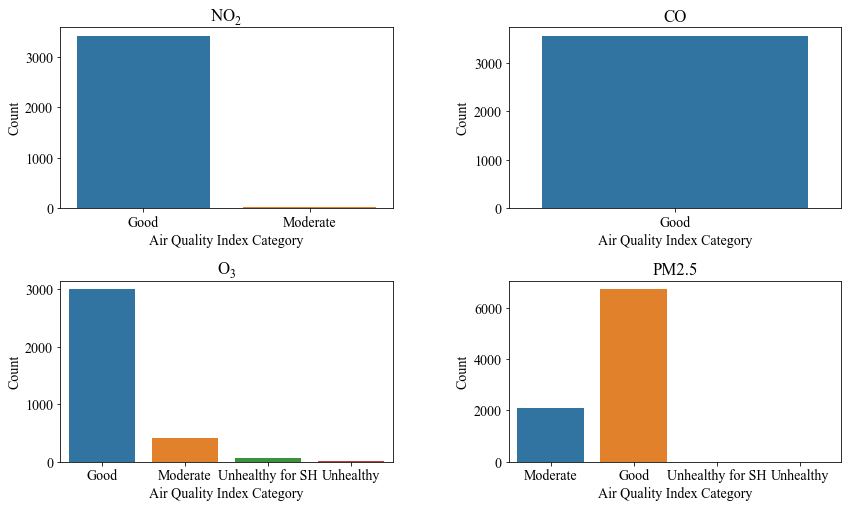

In [12]:
# Plot the count of the different AQI categories
fig, ax = plt.subplots(figsize=(14,8))
plt.gcf().subplots_adjust(hspace=0.4, wspace=0.35)

plt.subplot(2,2,1)
sns.countplot(df_no2['AQI_cat'])
plt.xlabel('Air Quality Index Category')
plt.ylabel('Count')
plt.title('$\mathregular{NO_2}$')

plt.subplot(2,2,2)
sns.countplot(df_co['AQI_cat'])
plt.xlabel('Air Quality Index Category')
plt.ylabel('Count')
plt.title('CO')

plt.subplot(2,2,3)
sns.countplot(df_o3['AQI_cat'])
plt.xlabel('Air Quality Index Category')
plt.ylabel('Count')
plt.title('$\mathregular{O_3}$')

plt.subplot(2,2,4)
sns.countplot(df_pm25['AQI_cat'])
plt.xlabel('Air Quality Index Category')
plt.ylabel('Count')
plt.title('PM2.5')

### Data Comparison with Correlations and Scatter Plots

In [13]:
# Since the gasesous air pollutants are precursors to aerosols, I will test their correlations and check if there is any.
# But I first need to make sure I have data for the same dates since all the data have differing date ranges.
# Therefore, I have to merge the files.

print('NO2')
df_no2_pm25 = pd.merge(df_no2, df_pm25, on='Date', how='inner')
print('Number of rows in merged data is', df_no2_pm25.shape[0], 'while number of rows in original gas data is', df_no2.shape[0])
# The number of rows is still large because of the extra columns created
print('---'*40)

print('CO')
df_co_pm25 = pd.merge(df_co, df_pm25, on='Date', how='inner')
print('Number of rows in merged data is', df_co_pm25.shape[0], 'while number of rows in original gas data is', df_co.shape[0])
print('---'*40)

print('O3')
df_o3_pm25 = pd.merge(df_o3, df_pm25, on='Date', how='inner')
print('Number of rows in merged data is', df_o3_pm25.shape[0], 'while number of rows in original gas data is', df_o3.shape[0])
print('---'*40)

NO2
Number of rows in merged data is 8452 while number of rows in original gas data is 3442
------------------------------------------------------------------------------------------------------------------------
CO
Number of rows in merged data is 5433 while number of rows in original gas data is 3560
------------------------------------------------------------------------------------------------------------------------
O3
Number of rows in merged data is 8483 while number of rows in original gas data is 3494
------------------------------------------------------------------------------------------------------------------------


In [14]:
#df_no2_pm25['Daily Max 1-hour NO2 Concentration'].isnull().sum()
#df_no2_pm25['Daily Mean PM2.5 Concentration'].isnull().sum()
df_no2_pm25.corr()
df_co_pm25.corr()
df_o3_pm25.corr()
# We are only inerested in the correlation between Daily Max 1-hour NO2 Concentration and 
# Daily Mean PM2.5 Concentration. The same procedure is used for CO and O3

print('Correlation for NO2 vs PM2.5 is 0.016850')
print('Correlation for CO vs PM2.5 is 0.114545')
print('Correlation for O3 vs PM2.5 is 0.178440')

Correlation for NO2 vs PM2.5 is 0.016850
Correlation for CO vs PM2.5 is 0.114545
Correlation for O3 vs PM2.5 is 0.178440


Text(0.5, 1.0, 'PM2.5 vs O3')

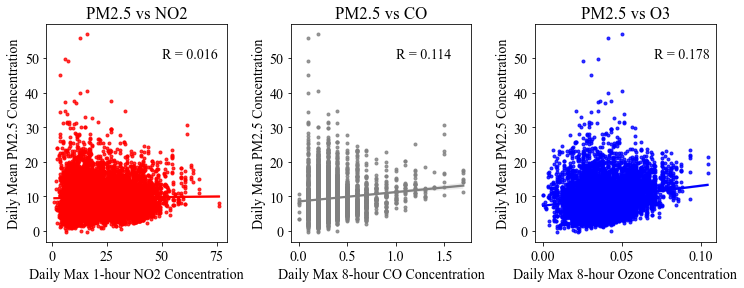

In [15]:
#PLot the scatter plots

fig, ax = plt.subplots(figsize=(12,4))
plt.gcf().subplots_adjust(hspace=0.4, wspace=0.35)

plt.subplot(1,3,1)
sns.regplot(x='Daily Max 1-hour NO2 Concentration', y='Daily Mean PM2.5 Concentration', data=df_no2_pm25, marker='.',
           color='red')
plt.text(50, 50, 'R = 0.016')
plt.title('PM2.5 vs NO2')

plt.subplot(1,3,2)
sns.regplot(x='Daily Max 8-hour CO Concentration', y='Daily Mean PM2.5 Concentration', data=df_co_pm25, marker='.',
           color='grey')
plt.text(1, 50, 'R = 0.114')
plt.title('PM2.5 vs CO')

plt.subplot(1,3,3)
sns.regplot(x='Daily Max 8-hour Ozone Concentration', y='Daily Mean PM2.5 Concentration', data=df_o3_pm25, marker='.',
           color='blue')
plt.text(0.07, 50, 'R = 0.178')
plt.title('PM2.5 vs O3')

### Comparing the normal year 2019 to the COVID year 2020

In [16]:
# Isolate the year from the date and select subsets of the data frame that match 2019 and 2020
df_no2['year'] = pd.to_datetime(df_no2['Date']).dt.year
df_co['year'] = pd.to_datetime(df_co['Date']).dt.year
df_o3['year'] = pd.to_datetime(df_o3['Date']).dt.year
df_pm25['year'] = pd.to_datetime(df_pm25['Date']).dt.year

In [17]:
# NO2
df_no2_2019 = df_no2[df_no2['year'] == 2019]
df_no2_2020 = df_no2[df_no2['year'] == 2020]

# CO
df_co_2019 = df_co[df_co['year'] == 2019]
df_co_2020 = df_co[df_co['year'] == 2020]

# O3
df_o3_2019 = df_o3[df_o3['year'] == 2019]
df_o3_2020 = df_o3[df_o3['year'] == 2020]

# PM2.5
df_pm25_2019 = df_pm25[df_pm25['year'] == 2019]
df_pm25_2020 = df_pm25[df_pm25['year'] == 2020]

Text(0.5, 1.0, 'PM 2.5')

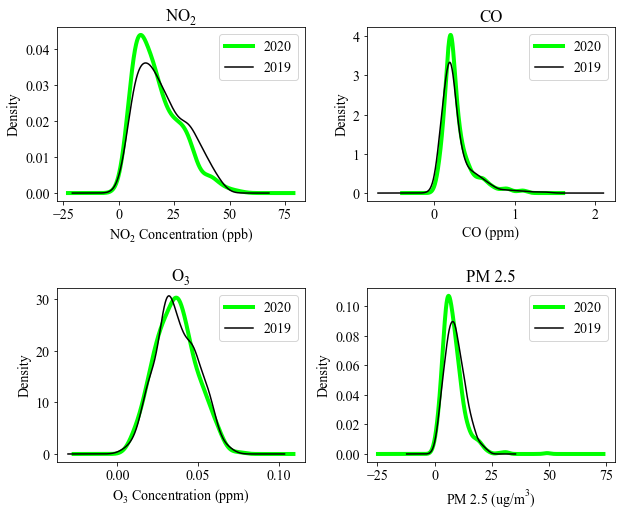

In [18]:
# Plot Kernel density plots to make the comparison

fig, ax = plt.subplots(figsize=(10,8))
plt.gcf().subplots_adjust(hspace=0.5, wspace=0.25)

plt.subplot(2,2,1)
df_no2_2020['Daily Max 1-hour NO2 Concentration'].plot.kde(color='lime', label='2020', linewidth=4)
df_no2_2019['Daily Max 1-hour NO2 Concentration'].plot.kde(color='black', label='2019')
plt.xlabel('$\mathregular{NO_2}$ Concentration (ppb)')
plt.legend()
plt.title('$\mathregular{NO_2}$')

plt.subplot(2,2,2)
df_co_2020['Daily Max 8-hour CO Concentration'].plot.kde(color='lime', label='2020', linewidth=4)
df_co_2019['Daily Max 8-hour CO Concentration'].plot.kde(color='black', label='2019')
plt.xlabel('CO (ppm)')
plt.legend()
plt.title('CO')

plt.subplot(2,2,3)
df_o3_2020['Daily Max 8-hour Ozone Concentration'].plot.kde(color='lime', label='2020', linewidth=4)
df_o3_2019['Daily Max 8-hour Ozone Concentration'].plot.kde(color='black', label='2019')
plt.xlabel('$\mathregular{O_3}$ Concentration (ppm)')
plt.legend()
plt.title('$\mathregular{O_3}$')

plt.subplot(2,2,4)
df_pm25_2020['Daily Mean PM2.5 Concentration'].plot.kde(color='lime', label='2020', linewidth=4)
df_pm25_2019['Daily Mean PM2.5 Concentration'].plot.kde(color='black', label='2019')
plt.xlabel('PM 2.5 (ug/$\mathregular{m^3}$)')
plt.legend()
plt.title('PM 2.5')

# Findings

#### 1. Means; NO2 = 21.5 ppb, CO = 0.3 ppm, O3 = 0.04 ppm, PM2.5 = 9.5 micrograms/m3
#### 2. Dallas was dominated by 'Good' air quality
#### 3. Although NO2, CO and O3 are precursors to aersols, all of them showed a very weak correlation with PM2.5
#### 4. There were minor differences in the air quality between 2019 and 2020. The latter had slightly more low NO2, CO and PM2.5 episodes and slightly more intense O3 episodes.